In [1]:
#import packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('./Dataset/AirPassengers.csv')
df['Month']=pd.to_datetime(df['Month'])
df = df.set_index('Month')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
#check missing values
df.isna().values.any()

False

In [6]:
#summary
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


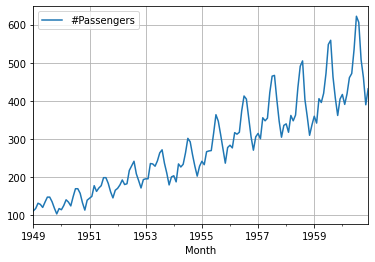

In [7]:
#imeseries plot
import matplotlib.pyplot as plt
df.plot()
plt.grid()
plt.show()

Skewness:  0.5831604861560892
Kurtosis: -0.364942


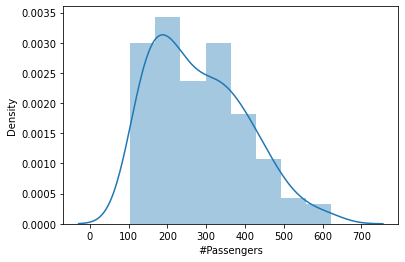

In [8]:
#passengers distribution
import seaborn as sns
sns.distplot(df['#Passengers'])
print('Skewness: ', df['#Passengers'].skew())
print("Kurtosis: %f" % df['#Passengers'].kurt())

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
number of lags: 13
number of observations: 130


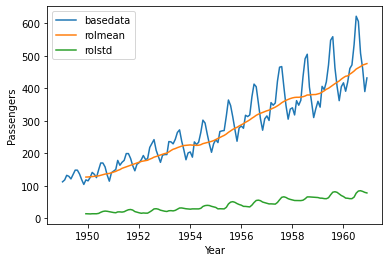

In [9]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(df)

rolmean = df.rolling(12).mean()
rolstd  = df.rolling(12).std()

#plot rolmean and rolstd
ori = plt.plot(df,label='basedata')
rollmean = plt.plot(rolmean,label='rolmean')
rollstd = plt.plot(rolstd,label='rolstd')
plt.legend()
plt.ylabel('Passengers')
plt.xlabel('Year')

#print ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('number of lags:', result[2])
print('number of observations:', result[3])

In [10]:
#not acceptable (p value > 0.05)

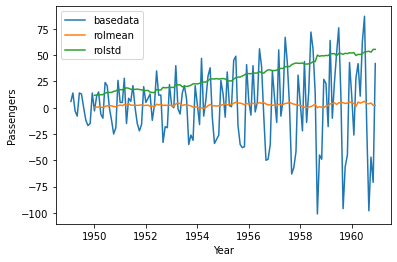

ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255
number of lags: 12
number of observations: 130


In [11]:
# Calculate the first difference of the time series
df_stationary = df.diff().dropna()

# Run ADF test on the differenced time series
results = adfuller(df_stationary)

#plot log data
rolmean_stat = df_stationary.rolling(12).mean()
rolstd_stat  = df_stationary.rolling(12).std()

# Plot the differenced time series
ori_stat = plt.plot(df_stationary,label='basedata')
rollmean_stat = plt.plot(rolmean_stat,label='rolmean')
rollstd_stat = plt.plot(rolstd_stat,label='rolstd')
plt.legend()
plt.ylabel('Passengers')
plt.xlabel('Year')
plt.show()

#print ADF statistic and p-value
print('ADF Statistic:', results[0])
print('p-value:', results[1])
print('number of lags:', results[2])
print('number of observations:', results[3])

In [12]:
#not acceptable (p value > 0.05)

ADF Statistic: -1.7170170891069607
p-value: 0.42236677477039125
number of lags: 13
number of observations: 130


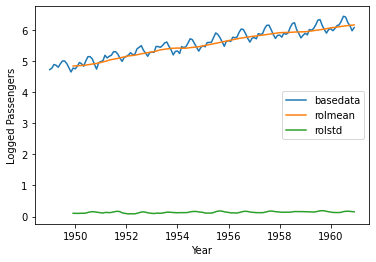

In [13]:
# Calculate log-return and drop nans
df_log = np.log(df)

# Run test and print
result_log = adfuller(df_log)

#plot log data
rolmean_log = df_log.rolling(12).mean()
rolstd_log  = df_log.rolling(12).std()

ori_log = plt.plot(df_log,label='basedata')
rollmean_log = plt.plot(rolmean_log,label='rolmean')
rollstd_log = plt.plot(rolstd_log,label='rolstd')
plt.legend()
plt.ylabel('Logged Passengers')
plt.xlabel('Year')

#print ADF statistic and p-value
print('ADF Statistic:', result_log[0])
print('p-value:', result_log[1])
print('number of lags:', result_log[2])
print('number of observations:', result_log[3])

In [14]:
#not acceptable (p value > 0.05)

ADF Statistic: -3.040034394109993
p-value: 0.0313210882607278
number of lags: 11
number of observations: 130


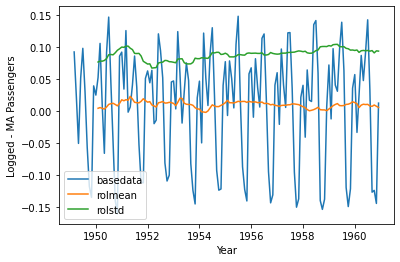

In [15]:
df_log_ma = (df_log - df_log.rolling(window=3).mean()).dropna()

# Run test and print
result_log_ma = adfuller(df_log_ma)

#plot log data
rolmean_log_ma = df_log_ma.rolling(12).mean()
rolstd_log_ma  = df_log_ma.rolling(12).std()

ori_log_ma = plt.plot(df_log_ma,label='basedata')
rollmean_log_ma = plt.plot(rolmean_log_ma,label='rolmean')
rollstd_log_ma = plt.plot(rolstd_log_ma,label='rolstd')
plt.legend()
plt.ylabel('Logged - MA Passengers')
plt.xlabel('Year')

#print ADF statistic and p-value
print('ADF Statistic:', result_log_ma[0])
print('p-value:', result_log_ma[1])
print('number of lags:', result_log_ma[2])
print('number of observations:', result_log_ma[3])

In [16]:
#acceptable (p value < 0.05)

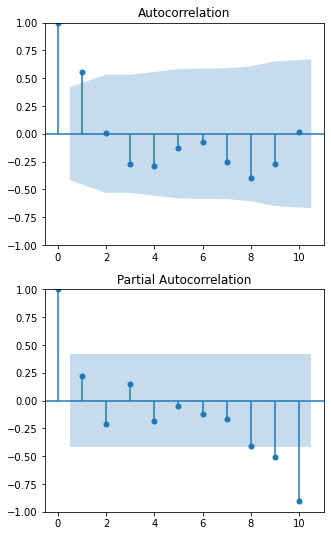

In [17]:
#we will use logscale-ma data
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,9))
 
# Plot the ACF of df
acf = acf(df_log_ma)
plot_acf(acf,lags=10, ax=ax1)

# Plot the PACF of df
pacf = pacf(df_log_ma)
plot_pacf(pacf,lags=10, ax=ax2)

plt.show()

In [18]:
df_log_ma.isna().values.any()

False

In [19]:
from sklearn.model_selection import train_test_split
#using train_test_split
df_log_ma.dropna(inplace=True)
train, test = train_test_split(df_log_ma, test_size = 0.1, shuffle = False)

In [20]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train, order=(13,1,2))
model_fit = model.fit()
model_pred = model_fit.predict(start='1959-10-01',end='1960-12-01')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


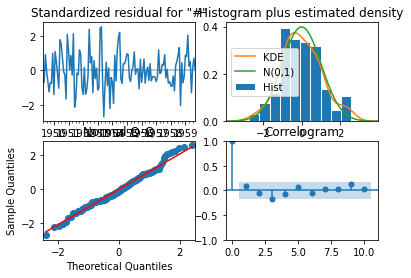

In [21]:
model_fit.plot_diagnostics()
plt.show()

In [22]:
test

,#Passengers
Month,
1959-10-01,-0.148750
1959-11-01,-0.121084
1959-12-01,0.035772
1960-01-01,0.056880
1960-02-01,-0.033186
1960-03-01,0.024649
1960-04-01,0.086739
1960-05-01,0.047563
1960-06-01,0.091385


In [23]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test,model_pred)
error

0.0006082192691623244

In [24]:
predict = np.exp(model_pred)
test_set = np.exp(test)

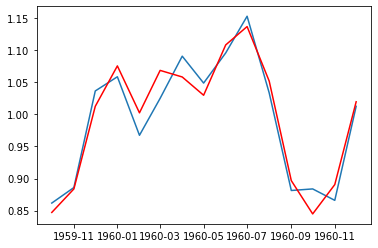

In [25]:
plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()

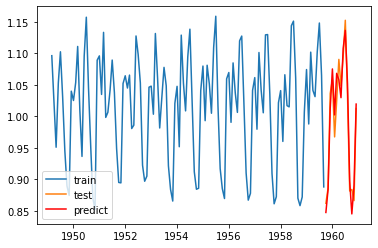

In [26]:
plt.plot(np.exp(train),label='train')
plt.plot(test_set,label='test')
plt.plot(predict,color='red',label='predict')
plt.legend(loc='best')
plt.show()

In [27]:
model = sm.tsa.arima.ARIMA(df_log_ma, order=(13,1,2))
model_fit = model.fit()
model_pred = model_fit.predict(start='1961-01-01',end='1963-12-01')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


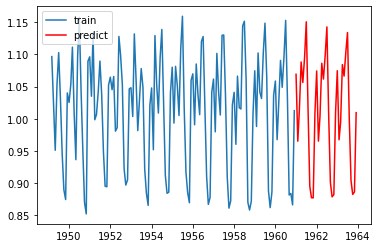

In [28]:
#predict passengers for the next 3 years
plt.plot(np.exp(df_log_ma),label='train')
plt.plot(np.exp(model_pred),color='red',label='predict')
plt.legend(loc='best')
plt.show()